In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

In [15]:
# Configurar la API Key
api_key = "**********"
# Inicializar Alpha Vantage
ts = TimeSeries(key=api_key, output_format='pandas')

In [3]:
data, meta_data = ts.get_daily(symbol='AAPL', outputsize='compact')

In [4]:
data.columns = ['open', 'high', 'low', 'close', 'volume']

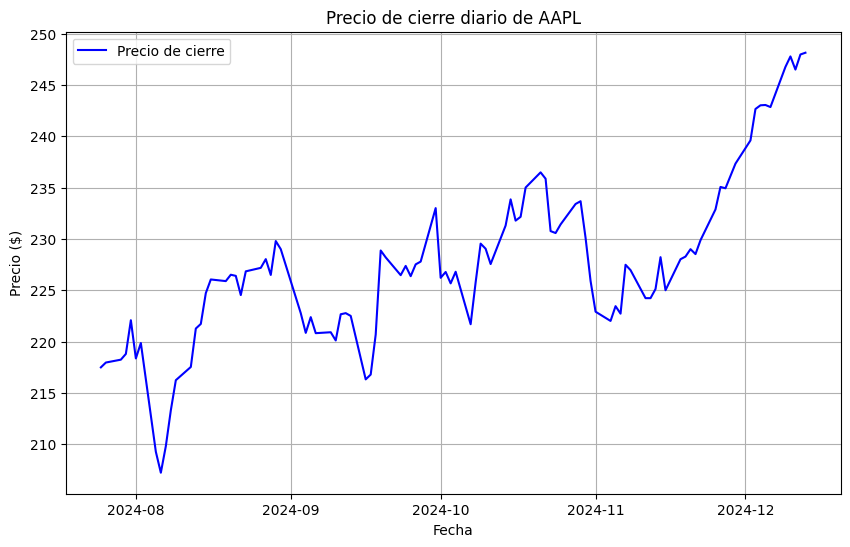

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(data['close'], label="Precio de cierre", color='blue')
plt.title("Precio de cierre diario de AAPL")
plt.xlabel("Fecha")
plt.ylabel("Precio ($)")
plt.legend()
plt.grid(True)
plt.show()

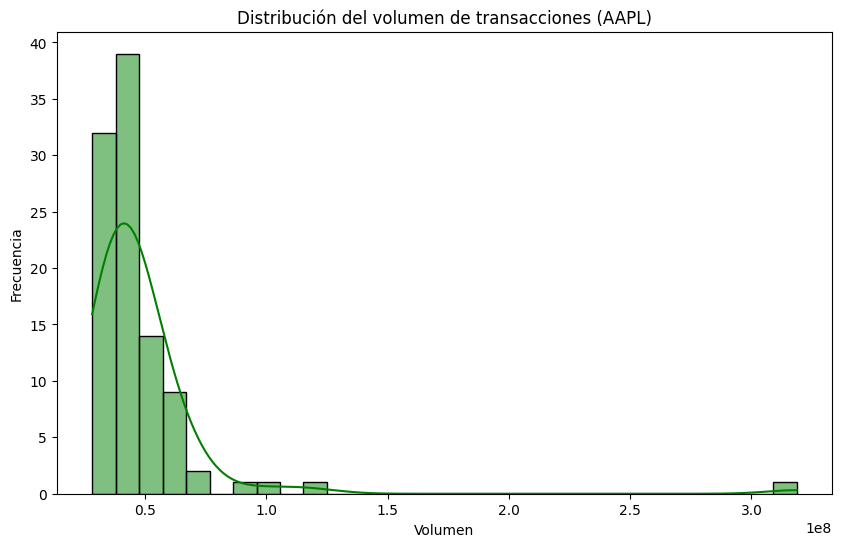

In [6]:
import seaborn as sns
# Histograma del volumen de transacciones
plt.figure(figsize=(10, 6))
sns.histplot(data['volume'], bins=30, kde=True, color='green')
plt.title("Distribución del volumen de transacciones (AAPL)")
plt.xlabel("Volumen")
plt.ylabel("Frecuencia")
plt.show()

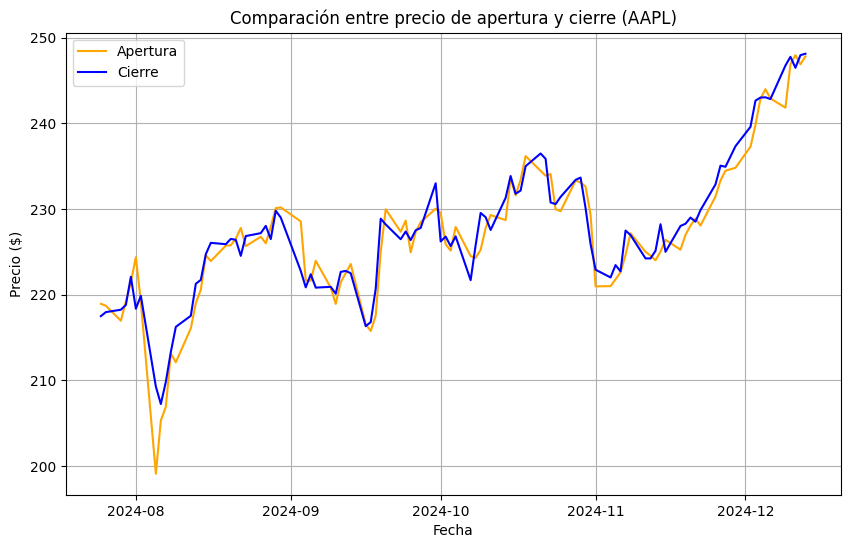

In [7]:
# Crear gráfica de comparación entre apertura y cierre
plt.figure(figsize=(10, 6))
plt.plot(data['open'], label="Apertura", color='orange')
plt.plot(data['close'], label="Cierre", color='blue')
plt.title("Comparación entre precio de apertura y cierre (AAPL)")
plt.xlabel("Fecha")
plt.ylabel("Precio ($)")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
import boto3

In [12]:
# Inicializar cliente de S3
s3 = boto3.client('s3')
bucket_name = 'project-apple-alphavantage'

In [13]:
# Subir gráfica a S3
bucket_name = 'project-apple-alphavantage'
s3.upload_file('AAPL_closing_price.png', bucket_name, 'visuals/AAPL_closing_price.png')
print("Gráfica subida a S3.")

Gráfica subida a S3.


In [14]:
# Descargar los datos desde Alpha Vantage
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_daily(symbol='AAPL', outputsize='compact')
# Guarda el archivo localmente
file_name = 'AAPL_daily.csv'
data.to_csv(file_name)
# Subir el archivo a S3
s3 = boto3.client('s3')
s3.upload_file(file_name, bucket_name, f"daily/{file_name}")